# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Introducción al Apendizaje Estadístico o Machine Learning

# Referencias para estas notas

* Cualquier texto de aprendizaje estadístico o machine learning.

* Pero vamos a seguir de cerca los capítulos 1 y 2 de [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf) y [The Elements of Statistical Learning](http://web.stanford.edu/~hastie/local.ftp/Springer/OLD/ESLII_print4.pdf).

* El primero es más introductorio y sirve para entender bien los conceptos.

* El tratamiento del segundo es más profundo y riguroso.

* **Los dos están disponibles gratis por los autores.**

# ¿Qué es Aprendizaje Estadístico?

* En términos generales, el aprendizaje estadístico no es más que el uso de modelos estadísticos con el objeto de aprender o descubrir el proceso de generación de unos datos (*data generating process*).

* En general hay dos tipos de aprendizaje:
    
    1. **Aprendizaje supervizado**: 
    el objetivo es aprender el proceso de generación de una variable o grupo de variables resultado $\mathbf{y}$ a partir de un grupo de variables predictoras (regresores en el contexto de un modelo de regresión) $\mathbf{X}$.  
    Se llama supervizado porque tenemos a $\bf y$ guiando o supervizando la calidad de los modelos, y el objetivo es conocer el proceso de generación de datos $f: X \rightarrow y$:
    $$
    y = f(X) + \epsilon
    $$
    
    2. **Aprendizaje no supervizado**: son todos aquellos casos donde pretendemos descubrir ciertas características de los datos $\bf X$ en ausencia del resultado o outcome.
    



# ¿Para qué utilizar aprendizaje estadístico?

Hay dos razones por las que queremos utilizar las técnicas de aprendizaje estadístico:

* **Predicción**:  En el caso de aprendizaje estadístico, si tenemos un modelo $\hat{f}(X)$, podemos estimar $y$:

$$
E(y) = \hat{f}(X) + E(\epsilon) = \hat{f}(X)
$$
 asumiendo que $E(\epsilon)=0$.

* **Inferencia**: queremos *entender* cuáles variables $X_1, X_2, \cdots, X_p$ afectan el resultado $y$, y de qué forma lo hacen.

# Modelos de regresión y clasificación

* Hay dos grandes clases de modelos supervizados que dependen del tipo de variable dependiente $\bf y$ que tengamos:

    * Si la variable es *cuantitativa* o contínua, utilizamos modelos de **regresión**.
    
    * Si la variable es *categórica* utilizamos modelos de **clasificación**.
    
* Por ejemplo, si queremos estimar el *ingreso* de la gente, en función de su género, edad y educación, utilizamos un modelo de *regresión*.

* Si queremos clasificar a un cliente en dos o más categorías, utilizamos un msdelo de clasificación.

    * Por ejemplo, queremos estimar la probabilidad que un cliente que pide una tarjeta de crédite deje de pagar.
    
    * Queremos estimar la probabilidad que una persona utilice su carro, el metro, el sistema de buses o la bicicleta.

    
* En los casos de modelos de clasificación, es usual utilizar etiquetas numéricas.  Por ejemplo:

$$ y = 
\begin{cases}
1 & \text{si cliente ha dejado de pagar} \\
0 & \text{si nunca ha dejado de pagar sus créditos}
\end{cases}
$$

o en el caso de más de una categoría

$$ y = 
\begin{cases}
1 & \text{si individuo utiliza metro} \\
2 & \text{si utiliza carro particular} \\
3 & \text{si utiliza bicicleta} \\
\end{cases}
$$

* En estos casos, la etiqueta numérica no tiene un carácter *ordinal*, lo que sí sucede con modelos de regresión donde el carácter ordinal define a la variable dependiente.

# ¿Cómo aprendemos el proceso de generación de datos? 


* Si queremos comparar modelos, necesitamos una métrica que nos permita decir si un modelo es mejor que otro.


* En modelos de regresión, la métrica estándar es el error cuadrático medio (MSE):
$$
MSE = \frac{1}{N}\sum_i (y_i - \hat{y}_i)^2
$$


* Así: un modelo $A$ as mejor que un modelo $B$ si $MSE_A < MSE_B$


* Alternativamente, si queremos hacer supuestos sobre la distribución del término de error $\epsilon$, podemos utilizar (el logaritmo de) la función de verosimilitud, $LL(\theta)$ en el caso de un modelo paramétrico con parámetros a estimar $\mathbf \theta$.

    * En este caso el mejor modelo es el que tiene un *mayor loglikelihood LL*.


* En el caso paramétrico, lineal en los parámetros $Y = X\beta + \epsilon$, ya sabemos que el **estimador de mínimos cuadrados ordinarios** (OLS, por sus siglas en inglés), es la solución al problema de minimizar el MSE.

# Y en el caso de modelos de clasificación:

* En modelos con supuestos sobre la distribución (ejemplo: modelos *Logit* o *Probit*), se puede utilizar la respectiva verosimilitud.


* Pero en general podemos usar la **tasa de error**:
$$
\frac{1}{N}\sum_i I(y_i \neq \hat{y}_i)
$$

    * Es decir, para cada observación, sabemos si fue clasificada correcta o incorrectmente.  Si fue incorrecta $y_i \neq \hat{y}_i$ la variable indicador toma el valor $1$, si fue correcta toma el valor $0$.


* Los modelos de clasificación suelen tener asociada una probabilidad condicional: $Prob(y_i \in C_k| x_i)$, es decir, la probabilidad de que una obsevación $i$ sea del tipo $k$, condicional en el valor de sus regresores $x_i = x_{1i},x_{2i}, \cdots, x_{pi},$.


* En estos casos, el clasificador que minimiza la tasa de error se conoce como el **clasificador de Bayes** ("Bayes classifier"), y asigna cada observación $i$ a la clase que tiene una mayor probabilidad de ocurrir $k^* = argmax_k Prob(y_i \in C_k| x_i)$

# Modelos paramétricos y modelos no paramétricos

* **Modelo paramétrico:** si tiene un *número fijo de parámetros* y se hacen supuestos sobre la forma funcional del proceso de generación de datos $f(x)$.

    * Ejemplo1: $y = \beta_0 + \beta_1 x_1 + \epsilon$
    
    * Ejemplo2: $Prob(y=1|x,\beta) = \Phi(x'\beta)$, donde $\Phi()$ es la función de distribución acumulativa de una variable aleatoria normal estándar.




* **Modelo no paramétrico:** si no se hacen supuestos sobre la forma funcional del proceso de generación de datos.

    * **K-nearest neighbors**: 
        
        * Queremos clasificar la observación $i$.
        * Para hacerlo miramos las categorías de las $K$ observaciones más cercanas de acuerdo con las variables independientes $x$, se obtienen las fracciones empíricas (ej. $1/3$ de los K vecinos son de la categoría $1$ y $2/3$ son de la categoría $0$):
        $$
        Prob \left(y_i=c|\mathbf{x_i},K \right) = \frac{1}{K}\sum_{j \in N_K(x_i)} I(y_j =c)
        $$

# Datos de entrenamiento y de prueba

* En el caso de aprendizaje supervizado, es usual dividir los datos en dos grupos:

    * **Datos de entrenamiento (training sample)**: son los datos que utilizamos para estimar o entrenar el modelo.  
        * Así, por definición, en el caso OLS, sabemos que los parámetros estimados $\hat{\mathbf{\beta}}$ minimizan el MSE en los datos de entrenamiento.  
    
    * **Datos de prueba (test sample)**: para calificar la precisión de un modelo utilizamos unos datos distintos a los que fueron necesarios para estimarlo.  Estos son los datos de prueba.


* En econometría hablamos de la predicción dentro (in-sample) y fuera (out-of-sample) de la muestra.  


* En aprendizaje de datos esta es una parte fundamental del método de aprendizaje.


* Dividir los datos en conjuntos de entrenamiento y prueba nos protege de problemas como **overfitting**: el MSE es no creciente en el número de regresores (por eso usamos el $\bar{R}^2$ en econometría).

# El tradeoff entre varianza y sesgo

* El MSE se puede descomponer en la varianza y el sesgo.


* Denotemos los datos por $\mathcal{D} = \{x_1, x_2, \cdots, x_N\}$


* Sean 
    * $\hat{\theta} = \hat{\theta}(\mathcal{D})$ nuestra estimación, 
    
    * $\bar{\theta} = E(\hat{\theta})$ el valor esperado de la estimación cuando variamos los datos.
    
    * $\theta^*$ el parametro verdadero.


* El MSE se puede escribir como:
$$
\begin{eqnarray*}
E\left[(\hat{\theta} - \theta^*)^2 \right] &=& E\left[\left[(\hat{\theta} - \bar{\theta}) + (\bar{\theta} - \theta^*) \right]^2\right]\\
&=& E(\hat{\theta} - \bar{\theta})^2 + 2(\bar{\theta} - \theta^*)E(\hat{\theta} - \bar{\theta}) + E(\bar{\theta} - \theta^*)^2\\
&=& Var(\hat{\theta}) + Bias^2
\end{eqnarray*}
$$


* La *varianza* se refiere a cuánto cambia la estimación si utilizamos otros datos de entrenamiento.


* El *sesgo* se refiere al error sistemático que se obtiene al aproximar el proceso de generación de datos verdadero por medio de un modelo simple.


* Por ejemplo, de nuestras clases de econometría sabemos que las *omitir variables* sesga la estimación.


* El tradeoff sugiere que a veces queremos **sacrificar un poco de *sesgo* si reducimos la *varianza* de la estimación**.

# Veamos un ejemplo

* Vamos a simular un modelo simple: 

$$
y = \alpha_0 + \alpha_1 x + \alpha_2 x^2 +\epsilon
$$

* Y vamos a estimar polinomios de orden cada vez mayor.

* El objetivo es ver cómo cae el MSE

* La moreleja es la siguiente:

> Con la muestra de entrenamiento, el MSE siempre cae

>> Pero esto ya lo sabían: por eso es útil el $\bar{R}^2$

In [86]:
# Tamaño de la muestra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# fijemos el seed
np.random.seed(456091215)

N = 200
# regresores y error
x = np.random.randn(N,1)
xmat = np.concatenate((np.ones((N,1)), x, np.power(x,2)), axis=1)
# Para el término de error vamos a utilizar una varianza mayor
epsilon = np.sqrt(10)*np.random.randn(N,1)
# coeficientes verdaderos: queremos una función cóncava (sin ninguna razón especial)
beta_true = np.array([-2,3,-2]).reshape((3,1))
y = np.dot(xmat,beta_true) + epsilon

print y.shape



(200, 1)


In [ ]:
# vamos a crear una función OLS para utilizar varias veces
def olsfun(y,X):
    '''
    ------------------
    Objetivo: estimar los coeficientes de un modelo de regresión lineal por medio de mínimos cuadrados
    ordinarios (OLS).
    ------------------
    Argumentos: 
    y: Variable dependiente: de tamaño Nx1
    X: matriz de variables independientes: de tamaño NxK
    ------------------
    Returns:
    betahat: vector de coeficientes estimados
    mse    : error cuadrático medio muestral
    ssr    : suma de residuos al cuadrado
    yhat   : y estimado
    ------------------
    '''
    N,K = X.shape
    # necesitamos la matriz inversa
    xtx = np.dot(X.T, X)
    xtxinv = np.linalg.inv(xtx)
    xty = np.dot(X.T,y)
    betahat = np.dot(xtxinv,xty)
    # obtengamos también el MSE
    yhat = np.dot(X,betahat)
    resids = y-yhat
    ssr  = np.dot(resids.T,resids)
    s2   = ssr/(N-K)
    mse  = ssr/N
    return betahat, mse[0,0], ssr[0,0], yhat

In [87]:
# Vamos a probar nuestra función:
# los parámetros se "parecen" a los verdaderos [-2,3,-2]
betahat, mse, ssr, yhat = olsfun(y,xmat)
betahat

array([[-2.39382534],
       [ 3.09666475],
       [-1.85003661]])

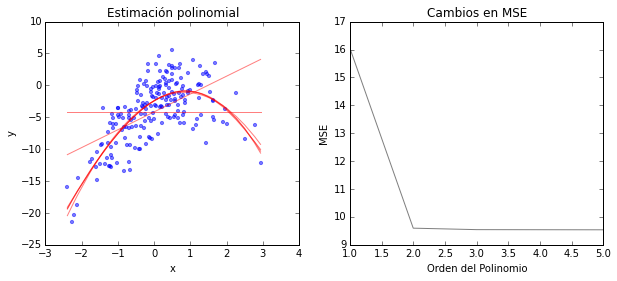

In [94]:
# Queremos estimar varios polinomios, digamos hasta orden omax
omax = 5
# y vamos a graficar los resultados:
f, axarr = plt.subplots(1,2,figsize=(10,4))
axarr[0].scatter(x, y, s = 10, color='b', alpha=0.5)
axarr[0].set_xlabel('x')
axarr[0].set_ylabel('y')
axarr[0].set_title(u'Estimación polinomial')
# acá vamos a guardar nuestros resultados de mse y ssr
MSEMat = np.zeros((omax,2))
#El loop es sobre los modelos
for m in np.arange(omax+1):
    # adentro necesitamos un loop para crear la matriz de regresores:
    newx = np.ones((N,1))
    # esto es todo en la primera iteración
    # en las otras tenemos que concatenar los polinomios
    if m>0:
        for v in np.arange(1,m+1):
            newx = np.concatenate((newx, np.power(x,v)), axis=1)
    # estamos listos para estimar el modelo 
    betahat, mse, ssr, yhat = olsfun(y,newx)
    # guardemos el mse
    MSEMat[m-1,:] = mse,ssr
    # Antes de graficar necesitamos ordernar las Xs, vamos a usar un dataframe
    data = pd.DataFrame(np.concatenate((yhat,x),axis=1), columns=['yhat','x']).sort(columns=['x'])
    axarr[0].plot(data.x, data.yhat,color='r', alpha=0.5)

# Afuera del loop podemos graficar los MSEs
axarr[1].plot(np.arange(1,omax+1), MSEMat[:,0],color='k', alpha=0.5)
axarr[1].set_xlabel('Orden del Polinomio')
axarr[1].set_ylabel('MSE')
axarr[1].set_title('Cambios en MSE')

    

# Experimentos de Monte Carlo

* ¿Cuándo probamos la función de OLS hace un par de diapósitivas, qué quería decir "parece"?


* Los experimentos de Monte Carlo nos permiten verificar las propiedades asintóticas de un modelo (es decir, qué pasa cuando $N \rightarrow \infty$).


* Por ejemplo, sabemos que si no hay variables omitidas y los regresores son exógenos, los estimadores de Mínimos Cuadrados Ordinarios son insesgados: $E(\hat{\beta}) = \beta$ donde $\beta$ es el verdadero vector de parámetros.
    * Esto lo debieron haber probado en su curso de econometría básica, y si no lo han hecho recomiendo que lo intenten.


* Vamos a verificar esta propiedades con un experimento de Monte Carlo simple:


* El pseudocódigo es así



```
for k in range(MaxIter):
    # iteración k: simulemos nuevos errores
    eps_k = draw(Normal)
    # simulemos el modelo nuevamente:
    y_k   = f(x,eps_k)
    # Estimemos beta y lo guardamos
    beta_k = ols(y_k,x)
```



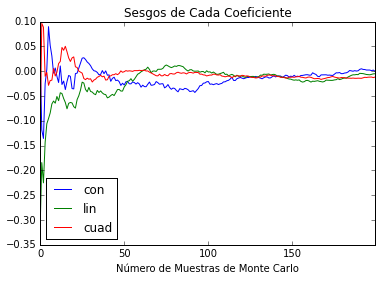

In [118]:
N = 200
# Inicialicemos los parámetros y las X por fuera:
x = np.random.randn(N,1)
xmat = np.concatenate((np.ones((N,1)), x, np.power(x,2)), axis=1)
beta_true = np.array([-2,3,-2]).reshape((3,1))
# Iinicialicemos el número de iteraciones y el vector donde guardaremos los resultados
MaxIter = 200
BetaMat = np.zeros((MaxIter,3))
BetaMat[:,:] = np.nan
BiasMat = np.zeros((MaxIter,3))
# listos para empezar
for k in range(MaxIter):
    # Para el término de error vamos a utilizar una varianza mayor
    epsilon = np.sqrt(10)*np.random.randn(N,1)
    # coeficientes verdaderos: queremos una función cóncava (sin ninguna razón especial)
    y = np.dot(xmat,beta_true) + epsilon
    # Estimemos el modelo
    betahat, mse, ssr, yhat = olsfun(y,xmat)
    BetaMat[k,:] = betahat.flatten()
    # Promedio hasta acá
    mean_beta = np.nanmean(BetaMat,axis=0)
    BiasMat[k,:] = beta_true.flatten() - mean_beta
    
# Grafiquemos los sesgos:
plt.figure(1)
pd.DataFrame(BiasMat,columns=['con','lin','cuad']).plot()
plt.title('Sesgos de Cada Coeficiente')
plt.xlabel(u'Número de Muestras de Monte Carlo')


# El Jackknife y Bootstrapping

* Una técnica relacionada son los estimadores de *Jackknife* y *Bootstrapping*

* Supongamos que nuestro modelo es:

$$
y = \alpha_0 x^{1/\alpha_1}e^{\epsilon}
$$

* Este modelo no es lineal en los parámetros, así que podemos buscar una transformación que lo vuelva lineal en los parámetros:

$$
\ln(y) = \beta_0 + \beta_1 \ln(x) + \epsilon
$$

donde $\beta_0 = \ln(\alpha_0)$ y $\beta_1 = 1/\alpha_1$

* Los parámeros transformados se pueden estimar por OLS, pero si nuestro interés es en los parámetros profundos (*estructurales*), cómo los estimamos, y mejor aún, cómo estimamos sus errores estándar?

# El Método Delta

* Una primera alternativa es utilizar el [método Delta](https://en.wikipedia.org/wiki/Delta_method) que consiste en hacer una aproximación de primer orden:

Si $\alpha = f(\beta)$, y $\beta \sim N(\mu_b,\sigma_b^2)$

$$
f(\beta) \approx f(\beta_0) + f'(\beta_0)(\beta - \beta_0)
$$
así que, si denotamos a $\alpha_0 := f(\beta_0)$
$$
\alpha - \alpha_0 \sim^{d} N(0, f'(\beta_0)^2 \sigma_b^2)
$$

(para los interesados $\sim^d$ significa convergencia en distribución, aunque una explicación de esto nos lleva por fuera del tema del curso)


# Otra alternativa: Bootstrap:

* Otra alternativa es seleccionar aleatoriamente submuestras (con reemplazo) de nuestras observaciones, estimar los coeficientes, transformarlos, y obtener la *distribución muestral*.

* El pseudocódigo es así:

```
#Fijemos un número de muestras de bootstrapping: B
for b in range(B):
    # Seleccionemos una muestra aleatoria de tamaño N con reemplazo de nuestro conjunto de N observaciones
    ind_b = rand_sample_reemplazo(N)
    # Estimemos beta con estas observaciones y guardemos
    beta_b = ols(y_b,x_b)
    # Guardemos la transformación:
    AlphaMat[b] = f(\beta_b)

# la varianza de alpha no es más que la varianza muestral de Alphamat
var_alpha = var(AlphaMat)

```


In [234]:
# estimemos un modelo así:
np.random.seed(19790625)
N = 300
alpha0 = 10
alpha1 = 2.0
# para que sea positivo, desplacémoslo
x      = 0.1*np.random.randn(N,1)
epsilon = np.sqrt(0.5)*np.random.randn(N,1)
# listos para estimar el modelo:
beta1  = 1/alpha1
y = alpha0*np.power(x,beta1)*np.exp(epsilon)
# Por la transformación tenemos NaNs en X
# Vamos a eliminar los NaNs
data = pd.DataFrame(np.concatenate((y,np.log(x)),axis=1), columns=['y','x']).dropna(subset= ['x'])
N = data.shape[0]
y = np.asarray(data.y).reshape((N,1))
x = np.asarray(np.exp(data.x.values)).reshape((N,1))
# Fijemos un número de muestras de Boostrapping:
B = 350
# Me voy a concentrar únicamente en alpha1
AlphaMat = np.zeros((B,2))
for b in range(int(B)):
    # seleccionemos aleatoriamente primer
    ind_b = np.random.choice(N,N)
    # seleccionemos los x y y
    x_b = np.log(x[ind_b].reshape((N,1)))
    y_b = np.log(y[ind_b].reshape((N,1)))
    # listos
    res_b = olsfun(y_b, np.concatenate((np.ones((N,1)),x_b),axis=1))
    AlphaMat[b,:] = res_b[0][1], 1/res_b[0][1]
# Estimemos sin Bootstrapping alpha_1
olsb = olsfun(np.log(y),np.concatenate((np.ones((N,1)),np.log(x)),axis=1))
print "La estimación OLS de alpha1 es: ", olsb[0][1],1/olsb[0][1]
print "La media muestral de alpha1 es: ", np.mean(AlphaMat,axis=0)
print "La varianza de alpha1 es: ", np.var(AlphaMat,axis=0)

La estimación OLS de alpha1 es:  [ 0.46153297] [ 2.16669244]
La media muestral de alpha1 es:  [ 0.46528508  2.19050678]
La varianza de alpha1 es:  [ 0.00389043  0.09927349]


# El estimador de Jackknife:

* El truco del estimador de Bootstrapping es simple:

* En un mundo imaginario tendríamos muchas muestras del proceso de generación de datos.

* En la vida real sólo tenemos una muestra de datos.

* Podemos obtener muchas muestras si suponemos que cada individuo fue seleccionado aleatoriamente con reemplazo.

    * **Nota:** por esto la técnica hay que modificarla en el caso de series de tiempo!
    
* Otra alternativa es estimar $N$ veces el modelo, y en cada iteración eliminar un individuo:

* Así:

$$
\begin{array}{l|l}
iter & muestra \\
\hline
0    & 1,2,\cdots,N-1 \\
1    & 0,2,\cdots,N-1 \\
2    & 0,1,3,\cdots,N-1 \\
\vdots    & \vdots \\
N-1  & 0,1,2,\cdots, N-2\\
\hline
\end{array}
$$


* Este queda en la tarea

# K-fold Cross-Validation 

* Volvamos a *machine learning*.

* Si tenemos varios modelos candidatos, ¿cómo seleccionamos un mejor modelo?

* Tenemos dos muestras:
    * **Entrenamiento:** los datos que utilizamos para estimar el modelo
    * **Prueba:** los datos que utilizamos para verificar si el modelo pronostica bien por fuera de la muestra de entrenamiento.
    
* Una alternativa es juzgar los modelos de acuerdo con el MSE en la muestra de prueba.

* Alternativamente, podemos generar varias muestras de prueba, o *muestras de validación*, un proceso parecido al bootstrapping o el jackknife.

* En el método de validación cruzada en K grupos (*k-fold cross-validation*), dividimos la muestra en $K$ grupos del mismo tamaño seleccionados de manera aleatoria:

    * En $K$ iteraciones, dejamos el grupo correspondiente como grupo de prueba, utilizamos los $K-1$ grupos para estimar el modelo (grupo de entrenamiento) y guardamos el $MSE_k$ del modelo evaluado en el *k-ésimo* grupo que fue excluido.
    
    * El mejor model es aquel que minimiza el MSE promedio
$$
CV(MSE) = \frac{1}{K}\sum_k MSE_k
$$


![caption](figures/kfoldcv.png)

[tomado de:](http://image.slidesharecdn.com/euro-202013-barrowcrone-130707073022-phpapp02/95/crossvalidation-aggregation-for-forecasting-7-638.jpg?cb=1373182327)

In [238]:
# Volvamos a nuestro ejemplo de los polinomios
# El modelo era:
np.random.seed(456091215)

N = 200
# regresores y error
x = np.random.randn(N,1)
xmat = np.concatenate((np.ones((N,1)), x, np.power(x,2)), axis=1)
# Para el término de error vamos a utilizar una varianza mayor
epsilon = np.sqrt(10)*np.random.randn(N,1)
# coeficientes verdaderos: queremos una función cóncava (sin ninguna razón especial)
beta_true = np.array([-2,3,-2]).reshape((3,1))
y = np.dot(xmat,beta_true) + epsilon

# Hagamos 5-fold CV:
# Dividamos en 5 grupos los datos
# Seleccionemos los números aleatorios
ind_rnd = pd.DataFrame(np.random.randn(N), columns=['random_num'])
# Ordenemos de menor a mayor, vamos a utilizar los índices para generar los números
rnd_sort = ind_rnd.sort(columns=['random_num'])
# Los grupos los obtenemos con los cuantiles
grp1 = rnd_sort[rnd_sort.random_num<=rnd_sort.random_num.quantile(0.2)].index
grp2 = rnd_sort[np.logical_and(rnd_sort.random_num>rnd_sort.random_num.quantile(0.2),
                               rnd_sort.random_num<=rnd_sort.random_num.quantile(0.4))].index
grp3 = rnd_sort[np.logical_and(rnd_sort.random_num>rnd_sort.random_num.quantile(0.4),
                               rnd_sort.random_num<=rnd_sort.random_num.quantile(0.6))].index
grp4 = rnd_sort[np.logical_and(rnd_sort.random_num>rnd_sort.random_num.quantile(0.6),
                               rnd_sort.random_num<=rnd_sort.random_num.quantile(0.8))].index
grp5 = rnd_sort[rnd_sort.random_num>rnd_sort.random_num.quantile(0.8)].index
print grp1.shape, grp2.shape, grp3.shape, grp4.shape, grp5.shape
ind_grp = (1*(np.in1d(np.arange(N),grp1.values)) + 
           2*(np.in1d(np.arange(N),grp2.values)) + 
           3*(np.in1d(np.arange(N),grp3.values)) + 
           4*(np.in1d(np.arange(N),grp4.values)) + 
           5*(np.in1d(np.arange(N),grp5.values))
           )
# miremos que quedó bien con un groupby
chk_grp = pd.Series(ind_grp).groupby(pd.Series(ind_grp)).count()
chk_grp

(40,) (40,) (40,) (40,) (40,)


1    40
2    40
3    40
4    40
5    40
dtype: int64

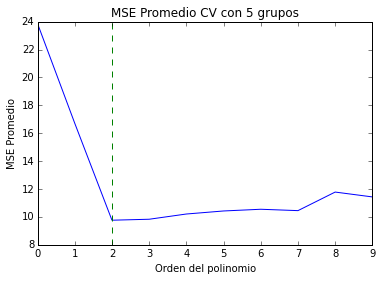

In [251]:
# Estamos listos:
# Necesitamos dos loops:
# Unos sobre los modelos: digamos orden 0-9
omax = 10
# Otro sobre las muestras de validación
MSECV = np.zeros((5,omax))
# loop externo: sobre las muestras de CV
for k in range(5):
    # Seleccionemos la muestra: tenemos que excluir al grupo v:
    ind_train = (ind_grp!=k+1)
    n_train   = int(ind_train.sum())
    ind_valid = (ind_grp==k+1)
    n_valid   = int(ind_valid.sum())
    # muestra de entrenamiento:
    y_train   = y[ind_train].reshape((n_train,1))
    x_train   = x[ind_train].reshape((n_train,1))
    # muestra de validación:
    y_valid   = y[ind_valid].reshape((n_valid,1))
    x_valid   = x[ind_valid].reshape((n_valid,1))
    # loop interno: sobre los modelos:
    for m in np.arange(omax):
        # adentro necesitamos un loop para crear la matriz de regresores:
        newx       = np.ones((n_train,1))
        newx_valid = np.ones((n_valid,1))
        # esto es todo en la primera iteración
        # en las otras tenemos que concatenar los polinomios
        if m>0:
            for v in np.arange(1,m+1):
                newx       = np.concatenate((newx, np.power(x_train,v)), axis=1)
                newx_valid = np.concatenate((newx_valid, np.power(x_valid,v)), axis=1)
        # estamos listos para estimar el modelo 
        betahat, mse, ssr, yhat = olsfun(y_train,newx)
        # Ya estimamos, ahora necesitamos el MSE pero en la muestra de validación
        yest_valid = np.dot(newx_valid,betahat)
        # Listos para guardar:
        diff  = y_valid - yest_valid
        MSECV[k,m] = np.dot(diff.T,diff)/n_valid
        
# Grafiquemos los resultados
mean_mse = pd.DataFrame(MSECV).mean().values
plt.plot(np.arange(omax),mean_mse)
plt.plot([2,2],[8,24],ls='--')
plt.xlabel('Orden del polinomio')
plt.ylabel('MSE Promedio')
plt.title('MSE Promedio CV con 5 grupos')
